# Analyse et nettoyage du csv owid-data-co2
L'objectif est d'analyser les NaN et de créer plusieurs autres csv plus concis contenant les informations dont nous aurons besoin pour nos analyses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
owid_co2 = pd.read_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/Raw CSV/owid-co2-data.csv')
owid_co2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Analyse des valeurs manquantes (NaN)**

In [ ]:
print(owid_co2.info())

na_rate = round(owid_co2.isna().mean()*100,2).reset_index()
na_rate = na_rate.rename(columns={0:"NaN_rate", "index":"Colonnes"})
na_rate = na_rate.sort_values(by="NaN_rate", ascending=False)
print("===========================================")
print("Proportion de NaN par colonnes :\n")
for c,t in zip(na_rate.Colonnes, na_rate.NaN_rate):
    print(f"{c} : {t}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

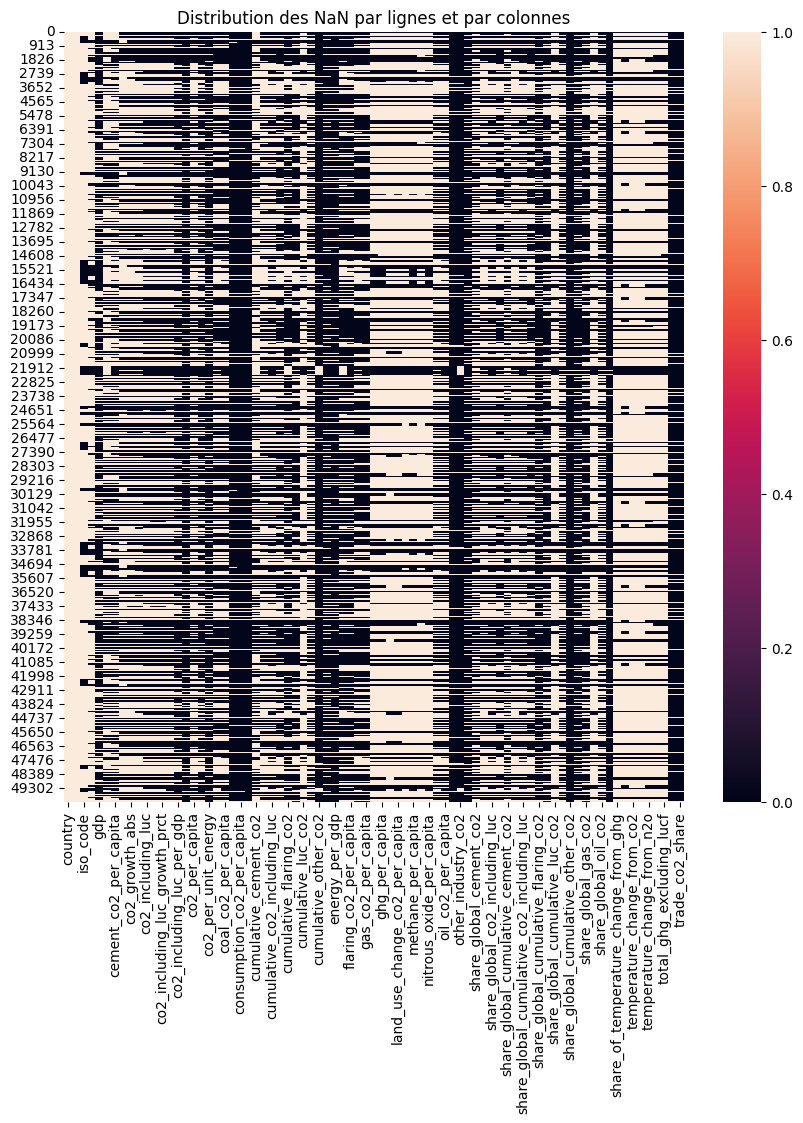

In [3]:
plt.figure(figsize=(10,10))
plt.title("Distribution des NaN par lignes et par colonnes")
sns.heatmap(owid_co2.notna());

In [ ]:
print("Les 20 colonnes ayant le plus de NaN :")
display(na_rate.head(20))

Les 20 colonnes ayant le plus de NaN :


,Colonnes,NaN_rate
64,share_global_cumulative_other_co2,95.80
69,share_global_other_co2,95.80
49,other_co2_per_capita,95.07
32,cumulative_other_co2,93.62
50,other_industry_co2,93.62
23,consumption_co2_per_gdp,91.15
22,consumption_co2_per_capita,91.03
77,trade_co2,90.96
78,trade_co2_share,90.96
21,consumption_co2,90.31


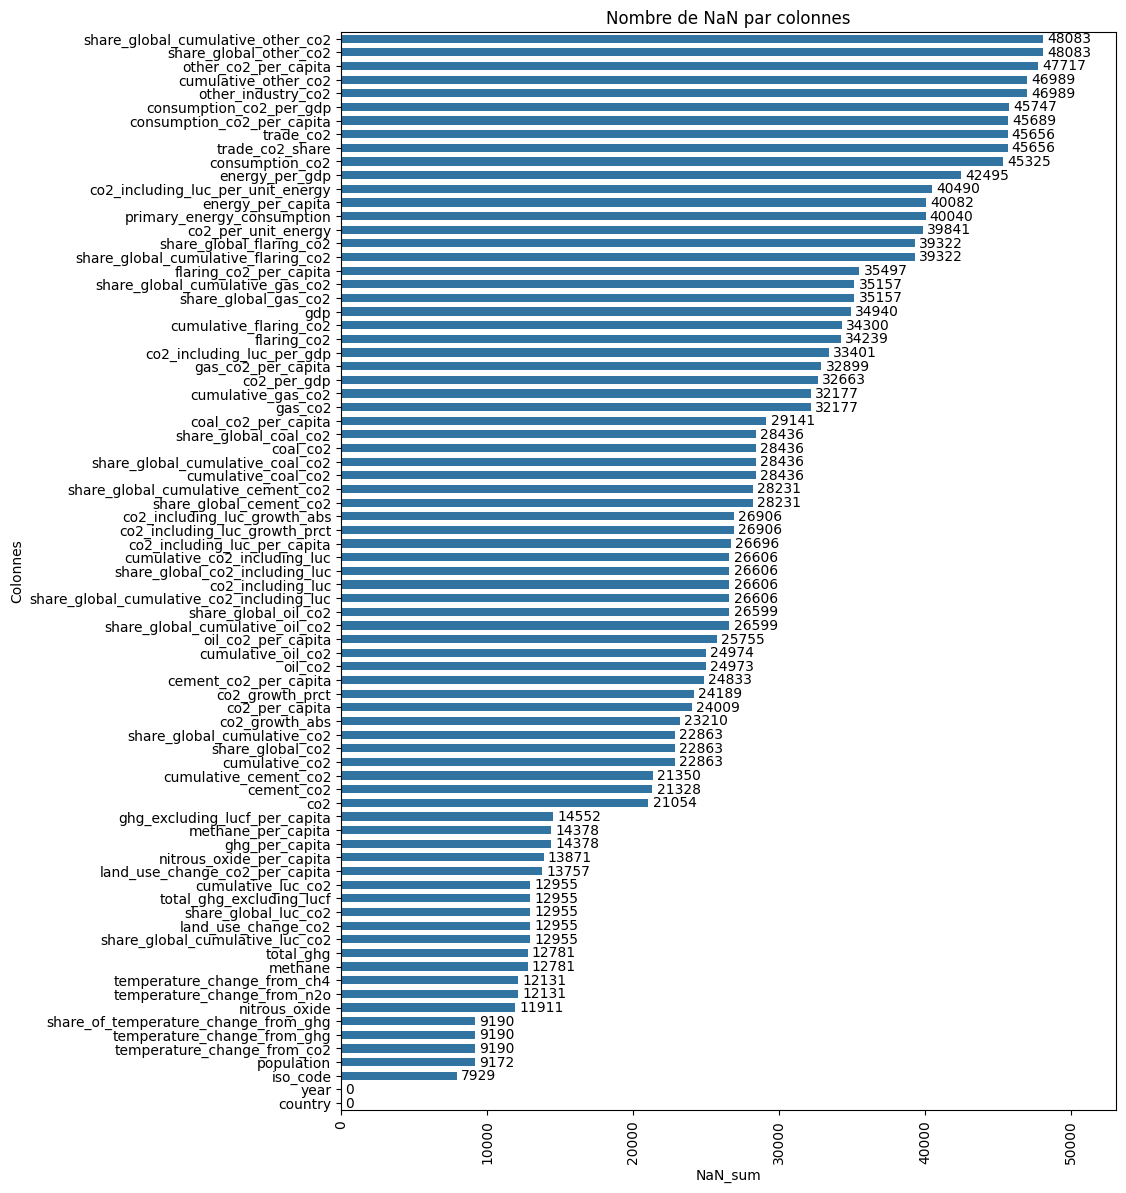

In [ ]:
na_sum = owid_co2.isna().sum().reset_index()
na_sum = na_sum.rename(columns={0:"NaN_sum", "index":"Colonnes"})
na_sum = na_sum.sort_values(by="NaN_sum", ascending=False)
plt.figure(figsize=(10,14))
plt.title("Nombre de NaN par colonnes")
ax = sns.barplot(y="Colonnes", x="NaN_sum", data=na_sum, width=0.6)
plt.xticks(rotation=90);
#affichage des valeurs à côté des barres
ax.bar_label(ax.containers[0], label_type="edge", padding=3)
#pour avoir un peu plus d'espace sur la droite pour afficher la valeur
plt.xlim(0, na_sum["NaN_sum"].max() + 5000)
plt.show();

L'on remarque qu'on a énormément de valeurs manquantes pour certaines colonnes.
Cela peut s'expliquer en partie par le fait que la période s'étend de 1880 à 2023, et qu'il n'y avait pas d'observations (ni de capteurs pour observer certaines valeurs) avant une certaine date.

Les colonnes suivantes ont plus de 90% de valeurs manquantes :
- share_global_cumulative_other_co2
- share_global_other_co2
- other_co2_per_capita
- cumulative_other_co2
- other_industry_co2
- consumption_co2_per_gdp
- consumption_co2_per_capita
- trade_co2
- trade_co2_share
- consumption_co2


Certaines colonnes ont exactement la même proportion de valeurs manquantes. On peut supposer pour certaines d'entre elles qu'elles sont toujours remplies ensemble.

Ainsi, nous pouvons distinguer plusieurs groupes ayant une proportion de NaN similaire, que nous affichons ci-dessous. Nous pouvons supposer que toutes les colonnes au sein d'un même groupe sont remplies ensemble, mais cela reste à vérifier avec le code ci-dessous.

In [ ]:
print("Affichage des groupes de colonnes ayant le même nombre de NaN.")
col_group = na_sum.groupby("NaN_sum").agg({"Colonnes":lambda x:list(x)})
for i, cList in zip(col_group.index, col_group["Colonnes"]):
  if len(cList)>1:
    print(cList, " :", i)
    #pour chaque ligne, true si ligne remplie de NaN pour les colonnes de cList, false sinon
    allNa = owid_co2[cList].isna().all(axis=1)
    #pour chaque ligne, true s'il n'y a aucun NaN pour les colonnes de cList, false sinon
    allNotNa = ~owid_co2[cList].isna().any(axis=1)
    #on veut vérifier que : soit la ligne n'a que des NaN, soit la ligne n'a aucun NaN, pour les colonnes de cList
    check = allNa | allNotNa
    print("Les colonnes ont-elles toujours des NaN sur les mêmes lignes ?", check.all())
    print("================================================")

Affichage des groupes de colonnes ayant le même nombre de NaN.
['year', 'country']  : 0
Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? True
['share_of_temperature_change_from_ghg', 'temperature_change_from_ghg', 'temperature_change_from_co2']  : 9190
Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? True
['temperature_change_from_ch4', 'temperature_change_from_n2o']  : 12131
Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? True
['total_ghg', 'methane']  : 12781
Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? True
['cumulative_luc_co2', 'total_ghg_excluding_lucf', 'share_global_luc_co2', 'land_use_change_co2', 'share_global_cumulative_luc_co2']  : 12955
Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? False
['methane_per_capita', 'ghg_per_capita']  : 14378
Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? True
['share_global_cumulative_co2', 'share_global_co2', 'cumulative_co2']  : 22863
Les colonnes on

Seules les colonnes de ce groupe n'ont pas systèmatiquement des lignes avec que des NaN ou aucun NaN :

 ['cumulative_luc_co2', 'total_ghg_excluding_lucf', 'share_global_luc_co2', 'land_use_change_co2', 'share_global_cumulative_luc_co2']

Tous les autres groupes possèdent des colonnes où, pour chaque ligne, soit il n'y a que des NaN, soit il y a aucun NaN, ce qui signifie qu'elles suivent la même logique de remplissage (si on possède les valeurs pour l'une, on possède les valeurs pour l'autre)

Nous pouvons analyser plus en détail le groupe précédent pour trouver la ou les colonnes qui ne suivent pas cette logique.

In [ ]:
col_list =  ['cumulative_luc_co2', 'total_ghg_excluding_lucf', 'share_global_luc_co2', 'land_use_change_co2', 'share_global_cumulative_luc_co2']

#pour chaque ligne, true si ligne remplie de NaN pour les colonnes de cList, false sinon
allNa = owid_co2[col_list].isna().all(axis=1)
#pour chaque ligne, true s'il n'y a aucun NaN pour les colonnes de cList, false sinon
allNotNa = ~owid_co2[col_list].isna().any(axis=1)
#on veut vérifier que : soit la ligne n'a que des NaN, soit la ligne n'a aucun NaN, pour les colonnes de cList
check = allNa | allNotNa

display(owid_co2.loc[~check, col_list])

#Avec ce code, nous comprenons que seule la colonne total_ghg_excluding_lucf a des NaN quand d'autres valeurs sont remplies pour les colonnes de ce groupe.

,cumulative_luc_co2,total_ghg_excluding_lucf,share_global_luc_co2,land_use_change_co2,share_global_cumulative_luc_co2
14471,0.544,NaN,0.021,0.544,0.021
14472,1.086,NaN,0.019,0.542,0.020
14473,1.620,NaN,0.019,0.534,0.019
14474,2.145,NaN,0.018,0.525,0.019
14475,2.656,NaN,0.018,0.511,0.019
...,...,...,...,...,...
48769,-0.002,NaN,-0.000,-0.000,-0.000
48770,-0.002,NaN,-0.000,-0.000,-0.000
48771,-0.002,NaN,-0.000,-0.000,-0.000
48772,-0.002,NaN,-0.000,-0.000,-0.000


In [ ]:
#Vérification de notre supposition
col_list =  ['cumulative_luc_co2', 'share_global_luc_co2', 'land_use_change_co2', 'share_global_cumulative_luc_co2']

#pour chaque ligne, true si ligne remplie de NaN pour les colonnes de cList, false sinon
allNa = owid_co2[col_list].isna().all(axis=1)
#pour chaque ligne, true s'il n'y a aucun NaN pour les colonnes de cList, false sinon
allNotNa = ~owid_co2[col_list].isna().any(axis=1)
#on veut vérifier que : soit la ligne n'a que des NaN, soit la ligne n'a aucun NaN, pour les colonnes de cList
check = allNa | allNotNa
print("Les colonnes ont-elles toujours des NaN sur les mêmes lignes ?", check.all())

Les colonnes ont-elles toujours des NaN sur les mêmes lignes ? True


Le travail précédent nous permet de rassembler les colonnes par groupes au sein desquels, pour chaque ligne, soit toutes les colonnes du groupe ont des NaN, soit aucune d'entre elles n'en a. Cela pourra faciliter le découpage du dataframe et le nettoyage des NaN, en rassemblant les colonnes cohérentes entre elles.

Voici donc les groupes ayant des colonnes cohérentes entre elles, à savoir que si l'une est remplie, les autres du même groupe le sont également :

['year', 'country']

['share_of_temperature_change_from_ghg', 'temperature_change_from_ghg', 'temperature_change_from_co2']  

['temperature_change_from_ch4', 'temperature_change_from_n2o']

['total_ghg', 'methane']

['cumulative_luc_co2',  'share_global_luc_co2', 'land_use_change_co2', 'share_global_cumulative_luc_co2']

['methane_per_capita', 'ghg_per_capita']

['share_global_cumulative_co2', 'share_global_co2', 'cumulative_co2']

['share_global_oil_co2', 'share_global_cumulative_oil_co2']

['cumulative_co2_including_luc', 'share_global_co2_including_luc', 'co2_including_luc', 'share_global_cumulative_co2_including_luc']

['co2_including_luc_growth_abs', 'co2_including_luc_growth_prct']

['share_global_cumulative_cement_co2', 'share_global_cement_co2']

['share_global_coal_co2', 'coal_co2', 'share_global_cumulative_coal_co2', 'cumulative_coal_co2']  

['cumulative_gas_co2', 'gas_co2']  

['share_global_cumulative_gas_co2', 'share_global_gas_co2']

['share_global_flaring_co2', 'share_global_cumulative_flaring_co2']

['trade_co2', 'trade_co2_share']

['cumulative_other_co2', 'other_industry_co2']

['share_global_cumulative_other_co2', 'share_global_other_co2']

# Analyse des country et iso_code

In [ ]:
print("\nUnique countries:")
print(owid_co2['country'].unique())
print("Nombre de countries :", len(owid_co2['country'].unique()))
print("============================================================")
print("\nUnique iso_codes:")
print(owid_co2['iso_code'].unique())
print("Nombre de iso_code :", len(owid_co2['iso_code'].unique()))



Unique countries:
['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Asia (GCP)' 'Asia (excl. China and India)'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Central America (GCP)' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (GCP

Nous constatons plusieurs choses :

1) Il y a 255 countries différents et 219 iso_code différents (dont la valeur 'nan'). Cela est logique avec l'observation des NaN : toutes les lignes ont le country qui est rempli, mais certaines ont des NaN pour l'iso_code.

2) Les countries ne sont pas forcément des noms de pays. Nous pouvons par exemple voir des zones géographiques comme 'Middle East', 'World', 'European Union'...

3) Certains countries semblent très proches et incluent des pays identiques, par exemple : 'Europe'
 'Europe (GCP)' 'Europe (excl. EU-27)' 'Europe (excl. EU-28)'
 'European Union (27)' 'European Union (28)'


 Nous pouvons en déduire que quand une ligne possède véritablement un pays en country, alors l'iso_code est NaN.
 Nous allons vérifier cette hypothèse, en récupérant un sous-dataframe ne contenant que les lignes dont l'iso_code est NaN et en y regardant les différents countries correspondant.

In [ ]:
owid_co2_no_iso = owid_co2[owid_co2['iso_code'].isna()]
print("Unique countries n'ayant pas d'iso_code :")
print(owid_co2_no_iso['country'].unique())
print("Nombre de countries n'ayant pas d'iso_code :", len(owid_co2_no_iso['country'].unique()))

Unique countries n'ayant pas d'iso_code :
['Africa' 'Africa (GCP)' 'Asia' 'Asia (GCP)'
 'Asia (excl. China and India)' 'Central America (GCP)' 'Europe'
 'Europe (GCP)' 'Europe (excl. EU-27)' 'Europe (excl. EU-28)'
 'European Union (27)' 'European Union (28)' 'High-income countries'
 'International aviation' 'International shipping'
 'International transport' 'Kosovo' 'Kuwaiti Oil Fires'
 'Kuwaiti Oil Fires (GCP)' 'Least developed countries (Jones et al.)'
 'Low-income countries' 'Lower-middle-income countries'
 'Middle East (GCP)' 'Non-OECD (GCP)' 'North America'
 'North America (GCP)' 'North America (excl. USA)' 'OECD (GCP)'
 'OECD (Jones et al.)' 'Oceania' 'Oceania (GCP)' 'Ryukyu Islands'
 'Ryukyu Islands (GCP)' 'South America' 'South America (GCP)'
 'Upper-middle-income countries' 'World']
Nombre de countries n'ayant pas d'iso_code : 37


Parmi ces régions, nous avons :

- des continents : Africa, Asia, Europe, North America, South America, Oceania
- les mêmes continents avec le suffixe (GCP) : cela signifie que l'on prend les données de l'organisation scientifique Global Carbon Project qui peuvent inclure des sources de données différentes et des ajustements méthodologiques, par exemple en incluant des sources d'émissions supplémentaires.
- le monde entier : World
- des unions de plusieurs pays : European Union (de différentes tailles selon l'époque), les pays de l'OCDE (Organisation de coopération et de développement économiques) ou non-OCDE, afin de voir la différence des tendances entre les pays développés et pays émergents., des pays peu développés...
- des sources particulières d'émissions : International aviation / shipping / transport, ou encore Kuwaiti Oil Fires qui est un évènement exceptionnel (incendies de puits de pétrole au Koweït) ayant eu un impact climatique significatif.


Pour nos analyses, il peut être intéressant d'avoir les dataframe suivants :
- un concernant uniquement le monde entier (country = 'World')
- un avec les données des continents
- un lié au transport, aviation, commerce maritime
- un pour comparer les pays développés / émergents / moins développés

In [ ]:
#création d'une liste contenant uniquement les colonnes qui nous intéressent à l'échelle du monde
colList = []
for c in owid_co2.columns:
  if ((c != 'iso_code') and (c != 'country')) and ('share' not in c):
    colList.append(c)

owid_co2_world = owid_co2.loc[owid_co2['country'] == 'World', colList].reset_index()
owid_co2_world = owid_co2_world.drop(columns=['index'])
display(owid_co2_world)

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,other_co2_per_capita,other_industry_co2,primary_energy_consumption,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
0,1750,7.532793e+08,NaN,NaN,NaN,9.306,NaN,NaN,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1751,NaN,NaN,NaN,NaN,9.407,0.101,1.088,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,NaN,NaN,NaN,NaN,9.505,0.098,1.041,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1753,NaN,NaN,NaN,NaN,9.610,0.105,1.108,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1754,NaN,NaN,NaN,NaN,9.734,0.123,1.281,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2019,7.811294e+09,1.221494e+14,1623.120,0.208,37104.273,373.850,1.018,40891.020,315.875,...,0.039,305.225,163346.594,0.401,1.090,1.571,0.080,52796.523,43147.367,0.004
270,2020,7.887001e+09,1.185900e+14,1638.271,0.208,35126.527,-1977.750,-5.330,38565.520,-2325.500,...,0.037,295.063,157667.719,0.406,1.107,1.595,0.081,50792.543,41394.840,0.000
271,2021,7.954448e+09,1.260048e+14,1696.308,0.213,36991.734,1865.208,5.310,40544.516,1978.995,...,0.038,301.444,165729.031,0.411,1.125,1.619,0.083,52938.793,43391.352,0.004
272,2022,8.021407e+09,1.301126e+14,1601.124,0.200,37293.836,302.100,0.817,40834.871,290.357,...,0.038,301.431,168708.203,0.417,1.143,1.644,0.084,53327.215,43746.762,0.004


In [ ]:
#Création du fichier csv owid-co2-world
owid_co2_world.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-world.csv', index=False)

In [ ]:
#Création du fichier csv owid-co2-continents
countriesList = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
 'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
 'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
 'European Union (27)', 'European Union (28)',
 'Middle East (GCP)', 'North America',
 'North America (GCP)', 'North America (excl. USA)',
  'Oceania', 'Oceania (GCP)',
 'South America', 'South America (GCP)']

owid_co2_continents = owid_co2[owid_co2['country'].isin(countriesList)]
owid_co2_continents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4680 entries, 274 to 42681
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    4680 non-null   object 
 1   year                                       4680 non-null   int64  
 2   iso_code                                   0 non-null      object 
 3   population                                 1711 non-null   float64
 4   gdp                                        0 non-null      float64
 5   cement_co2                                 3288 non-null   float64
 6   cement_co2_per_capita                      2748 non-null   float64
 7   co2                                        4340 non-null   float64
 8   co2_growth_abs                             2936 non-null   float64
 9   co2_growth_prct                            2597 non-null   float64
 10  co2_including_luc         

In [ ]:
#on remarque que les colonnes liées à gdp sont également null, en plus de iso_code ; on les supprime
colList = owid_co2.columns.to_list()
colList.remove('iso_code')
colList.remove('gdp')
colList.remove('energy_per_gdp')

owid_co2_continents = owid_co2[owid_co2['country'].isin(countriesList)][colList].reset_index()
owid_co2_continents = owid_co2_continents.drop(columns=['index'])

display(owid_co2_continents)

owid_co2_continents.info()


,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Africa,1750,80349715.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,1751,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,1752,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,1753,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,1754,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,South America (GCP),2019,NaN,NaN,NaN,1084.626,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4676,South America (GCP),2020,NaN,NaN,NaN,979.441,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4677,South America (GCP),2021,NaN,NaN,NaN,1079.731,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4678,South America (GCP),2022,NaN,NaN,NaN,1096.153,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    4680 non-null   object 
 1   year                                       4680 non-null   int64  
 2   population                                 1711 non-null   float64
 3   cement_co2                                 3288 non-null   float64
 4   cement_co2_per_capita                      2748 non-null   float64
 5   co2                                        4340 non-null   float64
 6   co2_growth_abs                             2936 non-null   float64
 7   co2_growth_prct                            2597 non-null   float64
 8   co2_including_luc                          2042 non-null   float64
 9   co2_including_luc_growth_abs               2026 non-null   float64
 10  co2_including_luc_growth

In [ ]:

for country in countriesList:
  print("country = ", country)
  sum_not_na = owid_co2_continents.loc[owid_co2_continents['country'] == country].notna().sum()
  empty_col_count = 0
  not_empty_col_count = 0
  for c in sum_not_na.index:
    if sum_not_na[c] == 0:
      #print(f"{c} : {sum_not_na[c]}")
      empty_col_count += 1
    else:
      not_empty_col_count += 1
  print("Nombre de colonnes vides :", empty_col_count)
  print("Nombre de colonnes non vides :", not_empty_col_count)
  print("============================")

country =  Africa
Nombre de colonnes vides : 5
Nombre de colonnes non vides : 71
country =  Africa (GCP)
Nombre de colonnes vides : 72
Nombre de colonnes non vides : 4
country =  Asia
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  Asia (GCP)
Nombre de colonnes vides : 72
Nombre de colonnes non vides : 4
country =  Asia (excl. China and India)
Nombre de colonnes vides : 2
Nombre de colonnes non vides : 74
country =  Central America (GCP)
Nombre de colonnes vides : 72
Nombre de colonnes non vides : 4
country =  Europe
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  Europe (GCP)
Nombre de colonnes vides : 72
Nombre de colonnes non vides : 4
country =  Europe (excl. EU-27)
Nombre de colonnes vides : 7
Nombre de colonnes non vides : 69
country =  Europe (excl. EU-28)
Nombre de colonnes vides : 7
Nombre de colonnes non vides : 69
country =  European Union (27)
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  Europe

On constate que les countries "(GCP)" ont toujours 4 colonnes non vides et 72 colonnes vides.

Rassemblons-les dans un seul dataframe, et faisons un autre dataframe sans ces countries.


In [ ]:
countries_gcp = []
for country in countriesList:
  if '(GCP)' in country:
    countries_gcp.append(country)

owid_co2_continents_gcp = owid_co2_continents[owid_co2_continents['country'].isin(countries_gcp)]

owid_co2_continents = owid_co2_continents[~owid_co2_continents['country'].isin(countries_gcp)]

print("countries dans owid_co2_continents_gcp :")
print(owid_co2_continents_gcp['country'].unique())
print("countries dans owid_co2_continents :")
print(owid_co2_continents['country'].unique())

countries dans owid_co2_continents_gcp :
['Africa (GCP)' 'Asia (GCP)' 'Central America (GCP)' 'Europe (GCP)'
 'Middle East (GCP)' 'North America (GCP)' 'Oceania (GCP)'
 'South America (GCP)']
countries dans owid_co2_continents :
['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'North America' 'North America (excl. USA)'
 'Oceania' 'South America']


In [ ]:
for country in owid_co2_continents_gcp['country'].unique():
  print("country = ", country)
  sum_not_na = owid_co2_continents_gcp.loc[owid_co2_continents_gcp['country'] == country].notna().sum()
  for c in sum_not_na.index:
    if sum_not_na[c] > 0:
      print(f"{c} : {sum_not_na[c]}")
  print("============================")


owid_co2_continents_gcp = owid_co2_continents_gcp.loc[:, ['country','year','co2','consumption_co2']]

display(owid_co2_continents_gcp)

country =  Africa (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  Asia (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  Central America (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  Europe (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  Middle East (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  North America (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  Oceania (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33
country =  South America (GCP)
country : 174
year : 174
co2 : 174
consumption_co2 : 33


,country,year,co2,consumption_co2
274,Africa (GCP),1850,0.000,NaN
275,Africa (GCP),1851,0.000,NaN
276,Africa (GCP),1852,0.000,NaN
277,Africa (GCP),1853,0.000,NaN
278,Africa (GCP),1854,0.000,NaN
...,...,...,...,...
4675,South America (GCP),2019,1084.626,1017.331
4676,South America (GCP),2020,979.441,973.737
4677,South America (GCP),2021,1079.731,1056.852
4678,South America (GCP),2022,1096.153,1075.900


In [ ]:
#Création du fichier csv owid_co2_continents_gcp
owid_co2_continents_gcp.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-continents-gcp.csv', index=False)

In [ ]:
for country in owid_co2_continents['country'].unique():
  print("country = ", country)
  sum_not_na = owid_co2_continents.loc[owid_co2_continents['country'] == country].notna().sum()
  empty_col_count = 0
  not_empty_col_count = 0
  for c in sum_not_na.index:
    if sum_not_na[c] == 0:
      #print(f"{c} : {sum_not_na[c]}")
      empty_col_count += 1
    else:
      not_empty_col_count += 1
  print("Nombre de colonnes vides :", empty_col_count)
  print("Nombre de colonnes non vides :", not_empty_col_count)
  print("============================")

country =  Africa
Nombre de colonnes vides : 5
Nombre de colonnes non vides : 71
country =  Asia
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  Asia (excl. China and India)
Nombre de colonnes vides : 2
Nombre de colonnes non vides : 74
country =  Europe
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  Europe (excl. EU-27)
Nombre de colonnes vides : 7
Nombre de colonnes non vides : 69
country =  Europe (excl. EU-28)
Nombre de colonnes vides : 7
Nombre de colonnes non vides : 69
country =  European Union (27)
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  European Union (28)
Nombre de colonnes vides : 7
Nombre de colonnes non vides : 69
country =  North America
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country =  North America (excl. USA)
Nombre de colonnes vides : 7
Nombre de colonnes non vides : 69
country =  Oceania
Nombre de colonnes vides : 0
Nombre de colonnes non vides : 76
country 

In [ ]:
#Création du fichier csv owid_co2_continents
owid_co2_continents.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-continents.csv', index=False)

In [ ]:
international_transport = ['International aviation', 'International shipping', 'International transport']

colList = owid_co2.columns.to_list()
colList.remove('iso_code')

owid_co2_transport = owid_co2[owid_co2['country'].isin(international_transport)][colList].reset_index()
owid_co2_transport = owid_co2_transport.drop(columns=['index'])

display(owid_co2_transport)

print(owid_co2_transport.info())

display(owid_co2_transport.isna().mean())

,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,International aviation,1750,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,International aviation,1751,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,International aviation,1752,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,International aviation,1753,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,International aviation,1754,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,International transport,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
578,International transport,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
579,International transport,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
580,International transport,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 78 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    582 non-null    object 
 1   year                                       582 non-null    int64  
 2   population                                 0 non-null      float64
 3   gdp                                        0 non-null      float64
 4   cement_co2                                 548 non-null    float64
 5   cement_co2_per_capita                      0 non-null      float64
 6   co2                                        148 non-null    float64
 7   co2_growth_abs                             146 non-null    float64
 8   co2_growth_prct                            146 non-null    float64
 9   co2_including_luc                          0 non-null      float64
 10  co2_including_luc_growth_a

,0
country,0.000000
year,0.000000
population,1.000000
gdp,1.000000
cement_co2,0.058419
...,...
temperature_change_from_n2o,1.000000
total_ghg,1.000000
total_ghg_excluding_lucf,1.000000
trade_co2,0.941581


In [ ]:
mean_na = owid_co2_transport.isna().mean()
col_to_drop = []
#suppression des colonnes ayant 100% de NaN
for c in mean_na.index:
  if mean_na[c] == 1:
    col_to_drop.append(c)
print(col_to_drop)

owid_co2_transport = owid_co2_transport.drop(columns=col_to_drop)

display(owid_co2_transport)

['population', 'gdp', 'cement_co2_per_capita', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2_per_capita', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_co2_including_luc', 'cumulative_luc_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita', 'primary_energy_consumption', 'share_global_co2_including_luc', 'share_global_cumulative_co2_including_luc', 'share_global_cumulative_luc_co2', 'share_global_luc_co2', 'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4', 'temperature_change_f

,country,year,cement_co2,co2,co2_growth_abs,co2_growth_prct,coal_co2,consumption_co2,cumulative_cement_co2,cumulative_co2,...,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,trade_co2,trade_co2_share
0,International aviation,1750,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,International aviation,1751,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,International aviation,1752,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,International aviation,1753,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,International aviation,1754,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,International transport,2019,NaN,NaN,NaN,NaN,NaN,1250.779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
578,International transport,2020,NaN,NaN,NaN,NaN,NaN,853.840,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
579,International transport,2021,NaN,NaN,NaN,NaN,NaN,893.621,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
580,International transport,2022,NaN,NaN,NaN,NaN,NaN,1020.083,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
#Suppression des colonnes ayant une seule valeur (qui vaut 0.0)
col_to_drop = []
for c in owid_co2_transport.columns:
    if len(owid_co2_transport[c].mode()) == 1:
      print(c, " - Valeur unique = ", owid_co2_transport[c].mode()[0])
      col_to_drop.append(c)

owid_co2_transport = owid_co2_transport.drop(columns=col_to_drop)

display(owid_co2_transport)

cement_co2  - Valeur unique =  0.0
coal_co2  - Valeur unique =  0.0
cumulative_cement_co2  - Valeur unique =  0.0
cumulative_coal_co2  - Valeur unique =  0.0
cumulative_flaring_co2  - Valeur unique =  0.0
cumulative_gas_co2  - Valeur unique =  0.0
cumulative_other_co2  - Valeur unique =  0.0
flaring_co2  - Valeur unique =  0.0
gas_co2  - Valeur unique =  0.0
other_industry_co2  - Valeur unique =  0.0
share_global_cement_co2  - Valeur unique =  0.0
share_global_coal_co2  - Valeur unique =  0.0
share_global_cumulative_cement_co2  - Valeur unique =  0.0
share_global_cumulative_coal_co2  - Valeur unique =  0.0
share_global_cumulative_flaring_co2  - Valeur unique =  0.0
share_global_cumulative_gas_co2  - Valeur unique =  0.0
share_global_cumulative_other_co2  - Valeur unique =  0.0
share_global_flaring_co2  - Valeur unique =  0.0
share_global_gas_co2  - Valeur unique =  0.0
share_global_other_co2  - Valeur unique =  0.0
trade_co2  - Valeur unique =  0.0
trade_co2_share  - Valeur unique =  0

,country,year,co2,co2_growth_abs,co2_growth_prct,consumption_co2,cumulative_co2,cumulative_oil_co2,oil_co2,share_global_co2,share_global_cumulative_co2,share_global_cumulative_oil_co2,share_global_oil_co2
0,International aviation,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,International aviation,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,International aviation,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,International aviation,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,International aviation,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,International transport,2019,NaN,NaN,NaN,1250.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,International transport,2020,NaN,NaN,NaN,853.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,International transport,2021,NaN,NaN,NaN,893.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,International transport,2022,NaN,NaN,NaN,1020.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(owid_co2_transport.info())

print(owid_co2_transport['country'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          582 non-null    object 
 1   year                             582 non-null    int64  
 2   co2                              148 non-null    float64
 3   co2_growth_abs                   146 non-null    float64
 4   co2_growth_prct                  146 non-null    float64
 5   consumption_co2                  34 non-null     float64
 6   cumulative_co2                   148 non-null    float64
 7   cumulative_oil_co2               148 non-null    float64
 8   oil_co2                          148 non-null    float64
 9   share_global_co2                 148 non-null    float64
 10  share_global_cumulative_co2      148 non-null    float64
 11  share_global_cumulative_oil_co2  148 non-null    float64
 12  share_global_oil_co2  

In [ ]:
owid_co2_shipping_aviation = owid_co2_transport[owid_co2_transport['country'] != 'International transport']


,country,year,co2,co2_growth_abs,co2_growth_prct,consumption_co2,cumulative_co2,cumulative_oil_co2,oil_co2,share_global_co2,share_global_cumulative_co2,share_global_cumulative_oil_co2,share_global_oil_co2
548,International transport,1990,NaN,NaN,NaN,551.534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,International transport,1991,NaN,NaN,NaN,546.446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,International transport,1992,NaN,NaN,NaN,557.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,International transport,1993,NaN,NaN,NaN,561.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,International transport,1994,NaN,NaN,NaN,588.277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,International transport,1995,NaN,NaN,NaN,620.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,International transport,1996,NaN,NaN,NaN,672.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,International transport,1997,NaN,NaN,NaN,707.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,International transport,1998,NaN,NaN,NaN,750.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,International transport,1999,NaN,NaN,NaN,777.237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
owid_co2_transport = owid_co2_transport.loc[owid_co2_transport['country'] == 'International transport', ['year','consumption_co2']]


,year,consumption_co2
548,1990,551.534
549,1991,546.446
550,1992,557.481
551,1993,561.055
552,1994,588.277
553,1995,620.757
554,1996,672.150
555,1997,707.034
556,1998,750.013
557,1999,777.237


In [ ]:
#Création du fichier csv owid_co2_transport
owid_co2_transport.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid_co2_transport.csv', index=False)

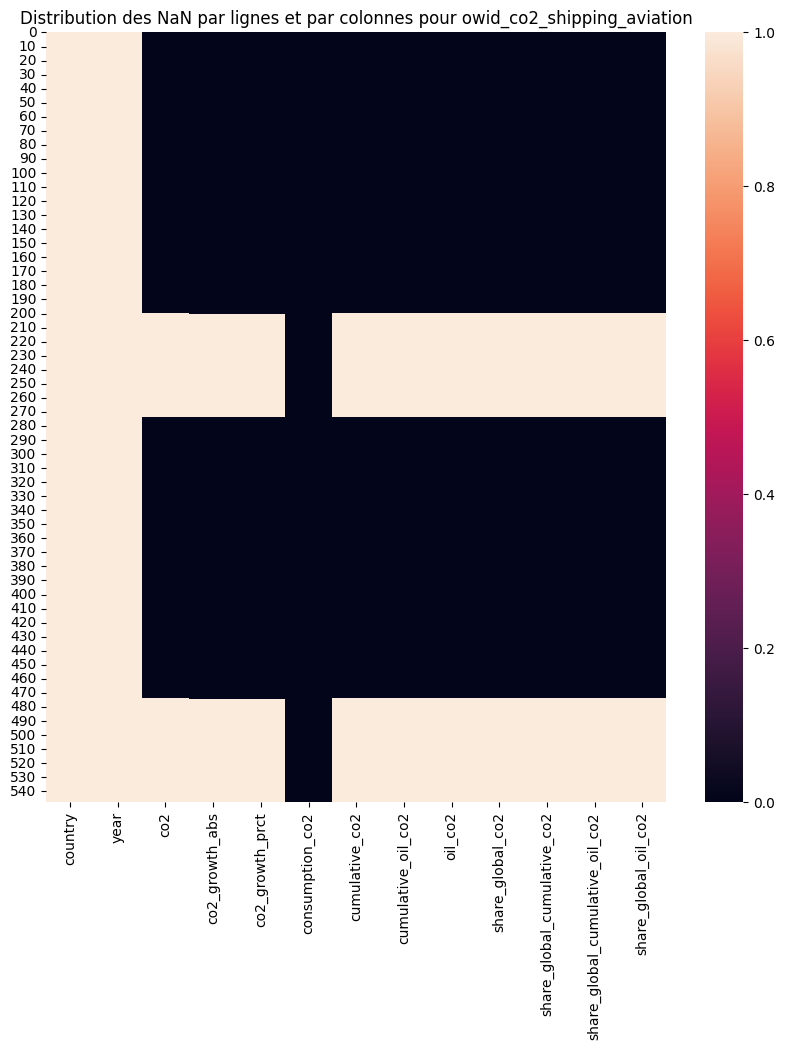

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribution des NaN par lignes et par colonnes pour owid_co2_shipping_aviation")
sns.heatmap(owid_co2_shipping_aviation.notna());

In [ ]:
owid_co2_shipping_aviation = owid_co2_shipping_aviation.drop(['consumption_co2'], axis=1)

In [ ]:
owid_co2_shipping_aviation = owid_co2_shipping_aviation.dropna()

print(owid_co2_shipping_aviation.info())
print(owid_co2_shipping_aviation.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 201 to 547
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          146 non-null    object 
 1   year                             146 non-null    int64  
 2   co2                              146 non-null    float64
 3   co2_growth_abs                   146 non-null    float64
 4   co2_growth_prct                  146 non-null    float64
 5   cumulative_co2                   146 non-null    float64
 6   cumulative_oil_co2               146 non-null    float64
 7   oil_co2                          146 non-null    float64
 8   share_global_co2                 146 non-null    float64
 9   share_global_cumulative_co2      146 non-null    float64
 10  share_global_cumulative_oil_co2  146 non-null    float64
 11  share_global_oil_co2             146 non-null    float64
dtypes: float64(10), int64(1),

In [ ]:
#Création du fichier csv owid_co2_shipping_aviation
owid_co2_shipping_aviation.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/Cleaned CSV/owid_co2_shipping_aviation.csv', index=False)

In [ ]:
#Récupération des countries correspondant à : pays développés / émergents / peu développés

countriesList = ['High-income countries',
 'Least developed countries (Jones et al.)',
 'Low-income countries', 'Lower-middle-income countries',
 'Non-OECD (GCP)', 'OECD (GCP)',
 'OECD (Jones et al.)',
 'Upper-middle-income countries']


colList = owid_co2.columns.to_list()
colList.remove('iso_code')
colList.remove('gdp')
colList.remove('energy_per_gdp')

owid_co2_per_development = owid_co2[owid_co2['country'].isin(countriesList)][colList].reset_index()
owid_co2_per_development = owid_co2_per_development.drop(columns=['index'])

display(owid_co2_per_development)

owid_co2_per_development.info()

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,High-income countries,1750,1.645555e+08,0.000,0.000,9.306,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,High-income countries,1751,NaN,0.000,NaN,9.407,0.101,1.088,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,High-income countries,1752,NaN,0.000,NaN,9.505,0.098,1.041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,High-income countries,1753,NaN,0.000,NaN,9.610,0.105,1.108,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,High-income countries,1754,NaN,0.000,NaN,9.734,0.123,1.281,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,Upper-middle-income countries,2019,2.805469e+09,1056.132,0.374,16352.597,497.086,3.135,18567.617,799.226,...,64.599,34.900,0.167,0.356,0.548,0.025,24207.393,19834.740,-1786.065,-10.922
1788,Upper-middle-income countries,2020,2.817794e+09,1095.621,0.386,16202.027,-150.570,-0.921,17975.209,-592.407,...,64.941,35.119,0.170,0.364,0.560,0.026,23700.559,19636.297,-1744.108,-10.765
1789,Upper-middle-income countries,2021,2.826094e+09,1099.337,0.386,16980.641,778.614,4.806,18879.910,904.700,...,64.003,35.339,0.173,0.373,0.572,0.026,24647.146,20511.449,-1940.375,-11.427
1790,Upper-middle-income countries,2022,2.833259e+09,1001.571,0.351,16989.541,8.900,0.052,18732.439,-147.470,...,64.006,35.555,0.176,0.381,0.584,0.027,24704.945,20664.963,-1984.807,-11.683


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    1792 non-null   object 
 1   year                                       1792 non-null   int64  
 2   population                                 924 non-null    float64
 3   cement_co2                                 1096 non-null   float64
 4   cement_co2_per_capita                      916 non-null    float64
 5   co2                                        1083 non-null   float64
 6   co2_growth_abs                             724 non-null    float64
 7   co2_growth_prct                            724 non-null    float64
 8   co2_including_luc                          627 non-null    float64
 9   co2_including_luc_growth_abs               618 non-null    float64
 10  co2_including_luc_growth

In [ ]:
#Création du fichier csv owid_co2_per_development
owid_co2_per_development.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid_co2_per_development.csv', index=False)

In [ ]:
#récupération des lignes ayant un iso_code

owid_co2_iso = owid_co2[owid_co2['iso_code'].notna()]
owid_co2_iso.info()

#Création du fichier csv owid_co2_iso
owid_co2_iso.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid_co2_iso.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 42262 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    42262 non-null  object 
 1   year                                       42262 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 38216 non-null  float64
 4   gdp                                        15230 non-null  float64
 5   cement_co2                                 23745 non-null  float64
 6   cement_co2_per_capita                      21593 non-null  float64
 7   co2                                        23193 non-null  float64
 8   co2_growth_abs                             22873 non-null  float64
 9   co2_growth_prct                            22243 non-null  float64
 10  co2_including_luc          

In [ ]:
count_pop_by_year = owid_co2.groupby('year')['population'].agg(
    count_nan=lambda x: x.isna().sum(),
    count_not_nan=lambda x: x.notna().sum()
).reset_index()

count_pop_by_year[count_pop_by_year['count_not_nan']==0]

,year,count_nan,count_not_nan
1,1751,58,0
2,1752,58,0
3,1753,58,0
4,1754,58,0
5,1755,58,0
6,1756,58,0
7,1757,58,0
8,1758,58,0
9,1759,58,0
11,1761,58,0


## Je pense qu'on peut faire en sorte de merger continent et continent_gcp en ajoutant des colonnes correspondant aux données gcp, en faisant une colonne supplémentaire id pour le merge (continent + year)


In [ ]:
owid_co2_cont = pd.read_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-continents.csv')
owid_co2_cont_gcp = pd.read_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-continents-gcp.csv')

display(owid_co2_cont.head())
display(owid_co2_cont_gcp.head())

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Africa,1750,80349715.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,1751,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,1752,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,1753,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,1754,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,country,year,co2,consumption_co2
0,Africa (GCP),1850,0.0,NaN
1,Africa (GCP),1851,0.0,NaN
2,Africa (GCP),1852,0.0,NaN
3,Africa (GCP),1853,0.0,NaN
4,Africa (GCP),1854,0.0,NaN


In [ ]:
print(owid_co2_cont['country'].unique())
print(owid_co2_cont_gcp['country'].unique())

['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'North America' 'North America (excl. USA)'
 'Oceania' 'South America']
['Africa (GCP)' 'Asia (GCP)' 'Central America (GCP)' 'Europe (GCP)'
 'Middle East (GCP)' 'North America (GCP)' 'Oceania (GCP)'
 'South America (GCP)']


In [ ]:
print(owid_co2.loc[owid_co2['iso_code'].isna(), 'country'].unique())

['Africa' 'Africa (GCP)' 'Asia' 'Asia (GCP)'
 'Asia (excl. China and India)' 'Central America (GCP)' 'Europe'
 'Europe (GCP)' 'Europe (excl. EU-27)' 'Europe (excl. EU-28)'
 'European Union (27)' 'European Union (28)' 'High-income countries'
 'International aviation' 'International shipping'
 'International transport' 'Kosovo' 'Kuwaiti Oil Fires'
 'Kuwaiti Oil Fires (GCP)' 'Least developed countries (Jones et al.)'
 'Low-income countries' 'Lower-middle-income countries'
 'Middle East (GCP)' 'Non-OECD (GCP)' 'North America'
 'North America (GCP)' 'North America (excl. USA)' 'OECD (GCP)'
 'OECD (Jones et al.)' 'Oceania' 'Oceania (GCP)' 'Ryukyu Islands'
 'Ryukyu Islands (GCP)' 'South America' 'South America (GCP)'
 'Upper-middle-income countries' 'World']


In [ ]:
#Pour préparer le merge des 2 dataset, renommons les countries (GCP) en retirant le suffixe

owid_co2_cont_gcp['country'] = owid_co2_cont_gcp['country'].apply(lambda x: x.replace(' (GCP)', ''))

print(owid_co2_cont['country'].unique())
print(owid_co2_cont_gcp['country'].unique())

['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'North America' 'North America (excl. USA)'
 'Oceania' 'South America']
['Africa' 'Asia' 'Central America' 'Europe' 'Middle East' 'North America'
 'Oceania' 'South America']


In [ ]:
#Créons dans chaque df, une colonne d'index pour le merge, basée sur country + year

owid_co2_cont['id'] = owid_co2_cont['country'] + "_" + owid_co2_cont['year'].astype(str)
owid_co2_cont_gcp['id'] = owid_co2_cont_gcp['country'] + "_" + owid_co2_cont_gcp['year'].astype(str)

display(owid_co2_cont.head())
display(owid_co2_cont_gcp.head())

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,id
0,Africa,1750,80349715.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1750
1,Africa,1751,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1751
2,Africa,1752,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1752
3,Africa,1753,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1753
4,Africa,1754,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1754


,country,year,co2,consumption_co2,id
0,Africa,1850,0.0,NaN,Africa_1850
1,Africa,1851,0.0,NaN,Africa_1851
2,Africa,1852,0.0,NaN,Africa_1852
3,Africa,1853,0.0,NaN,Africa_1853
4,Africa,1854,0.0,NaN,Africa_1854


In [ ]:
#dans gcp, renommons les colonnes

owid_co2_cont_gcp = owid_co2_cont_gcp.rename(columns={'co2':'co2 (GCP)', 'consumption_co2':'consumption_co2 (GCP)'})
#supprimons les colonnes country et year pour éviter les doublons de colonnes dans le merge
owid_co2_cont_gcp = owid_co2_cont_gcp.drop(columns=['country', 'year'], axis=1)

display(owid_co2_cont.head())
display(owid_co2_cont_gcp.head())

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,id
0,Africa,1750,80349715.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1750
1,Africa,1751,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1751
2,Africa,1752,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1752
3,Africa,1753,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1753
4,Africa,1754,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa_1754


,co2 (GCP),consumption_co2 (GCP),id
0,0.0,NaN,Africa_1850
1,0.0,NaN,Africa_1851
2,0.0,NaN,Africa_1852
3,0.0,NaN,Africa_1853
4,0.0,NaN,Africa_1854


In [ ]:
#appliquons le merge par id

owid_co2_cont = owid_co2_cont.merge(owid_co2_cont_gcp, on='id', how='left')


In [ ]:
owid_co2_cont = owid_co2_cont.drop(columns=['id'])

In [ ]:
#mettons la colonne co2 (GCP) à côté de co2, et co2_consumption (GCP) à côté de co2_consumption
cols = owid_co2_cont.columns.tolist()
cols.remove('year')
cols.remove('country')
cols.remove('population')
cols.sort()
cols.insert(0, 'year')
cols.insert(1, 'country')
cols.insert(2, 'population')
owid_co2_cont = owid_co2_cont[cols]
display(owid_co2_cont.loc[owid_co2_cont['year']>1880])

,year,country,population,cement_co2,cement_co2_per_capita,co2,co2 (GCP),co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
131,1881,Africa,128863890.0,0.000,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,5.332,0.001,0.002,0.004,0.000,225.336,26.882,NaN,NaN
132,1882,Africa,129548955.0,0.000,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,5.276,0.001,0.003,0.004,0.000,257.469,27.148,NaN,NaN
133,1883,Africa,130249836.0,0.000,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,5.214,0.001,0.003,0.004,0.000,244.002,27.416,NaN,NaN
134,1884,Africa,130956522.0,0.000,0.000,0.022,0.022,NaN,NaN,16.946,...,NaN,5.147,0.001,0.003,0.004,0.000,237.165,27.684,NaN,NaN
135,1885,Africa,131669056.0,0.000,0.000,0.037,0.037,0.015,66.667,16.434,...,NaN,5.091,0.001,0.003,0.004,0.000,248.122,27.981,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,2019,South America,423548289.0,41.060,0.097,1084.626,1084.626,6.916,0.642,2546.332,...,2.094,9.181,0.045,0.093,0.144,0.006,3812.943,1527.522,-74.449,-6.864
3284,2020,South America,426213551.0,41.313,0.097,979.441,979.441,-105.185,-9.698,2478.592,...,2.166,9.153,0.045,0.094,0.146,0.007,3752.928,1411.788,-12.195,-1.245
3285,2021,South America,428331420.0,46.898,0.110,1079.731,1079.731,100.290,10.240,2816.267,...,2.120,9.125,0.046,0.096,0.148,0.007,3982.018,1516.688,-30.086,-2.786
3286,2022,South America,430492814.0,47.104,0.109,1096.153,1096.153,16.422,1.521,2660.583,...,2.121,9.089,0.046,0.097,0.149,0.007,3892.277,1537.734,-27.286,-2.489


In [ ]:
display(owid_co2_cont.loc[owid_co2_cont['year']>1880, ['year','country','co2','co2 (GCP)', 'consumption_co2', 'consumption_co2 (GCP)']])

,year,country,co2,co2 (GCP),consumption_co2,consumption_co2 (GCP)
131,1881,Africa,NaN,0.000,NaN,NaN
132,1882,Africa,NaN,0.000,NaN,NaN
133,1883,Africa,NaN,0.000,NaN,NaN
134,1884,Africa,0.022,0.022,NaN,NaN
135,1885,Africa,0.037,0.037,NaN,NaN
...,...,...,...,...,...,...
3283,2019,South America,1084.626,1084.626,1010.176,1017.331
3284,2020,South America,979.441,979.441,967.246,973.737
3285,2021,South America,1079.731,1079.731,1049.645,1056.852
3286,2022,South America,1096.153,1096.153,1068.867,1075.900


In [ ]:
owid_co2_cont.head()

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,co2 (GCP),consumption_co2 (GCP)
0,Africa,1750,80349715.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,1751,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,1752,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,1753,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,1754,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#sauvegarde du csv co2 continents
owid_co2_cont.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-continents.csv', index=False)

# Etude des différences entre les données co2 et les données co2 (GCP)

In [ ]:
owid_co2_cont.loc[(owid_co2_cont['co2'] != owid_co2_cont['co2 (GCP)']) & (owid_co2_cont['co2 (GCP)'].notna()) & (owid_co2_cont['co2'].notna())]

,year,country,population,cement_co2,cement_co2_per_capita,co2,co2 (GCP),co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
218,1968,Africa,346800965.0,6.745,0.019,257.271,257.268,20.226,8.533,1332.752,...,NaN,7.624,0.015,0.029,0.047,0.003,1913.707,593.488,NaN,NaN
231,1981,Africa,497620997.0,15.840,0.032,548.882,548.875,12.859,2.399,1410.708,...,NaN,8.038,0.027,0.036,0.067,0.004,2274.556,1009.608,NaN,NaN
232,1982,Africa,512958818.0,16.966,0.033,571.969,571.965,23.087,4.206,1346.775,...,NaN,8.052,0.027,0.036,0.068,0.004,2324.004,1049.895,NaN,NaN
233,1983,Africa,528232712.0,18.681,0.035,594.811,594.808,22.842,3.994,1438.102,...,NaN,8.065,0.028,0.037,0.070,0.005,2381.576,1080.618,NaN,NaN
234,1984,Africa,543638102.0,19.428,0.036,649.591,649.588,54.780,9.210,1662.273,...,NaN,8.081,0.029,0.038,0.071,0.005,2565.165,1164.190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,2021,Oceania,44558538.0,3.296,0.074,439.662,431.532,-10.005,-2.225,564.869,...,1.521,1.912,0.009,0.018,0.031,0.004,752.921,512.325,-56.768,-12.912
3012,2022,Oceania,45049682.0,3.253,0.073,433.029,424.828,-6.633,-1.509,556.868,...,1.566,1.893,0.009,0.018,0.031,0.004,750.941,505.250,-54.841,-12.665
3013,2023,Oceania,45563133.0,3.253,0.072,430.303,421.981,-2.726,-0.629,553.872,...,1.568,1.879,0.009,0.018,0.031,0.004,726.782,500.517,NaN,NaN
3264,2000,South America,348018740.0,31.027,0.089,812.434,812.433,-0.551,-0.068,3028.522,...,2.315,9.177,0.034,0.068,0.106,0.004,4018.413,1183.597,-59.552,-7.330


In [ ]:
owid_co2_cont['co2'] = owid_co2_cont['co2'].fillna(owid_co2_cont['co2 (GCP)'])
owid_co2_cont['co2 (GCP)'] = owid_co2_cont['co2 (GCP)'].fillna(owid_co2_cont['co2'])
diff_co2_gcp = abs(owid_co2_cont['co2'] - owid_co2_cont['co2 (GCP)'])

diff_co2_gcp.describe()

,0
count,2982.000000
mean,28.749346
std,213.992635
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2852.854000


In [ ]:
diff = owid_co2_cont.loc[abs(owid_co2_cont['co2'] - owid_co2_cont['co2 (GCP)']) > 1, ['year','country','co2', 'co2 (GCP)', 'co2_including_luc', 'consumption_co2', 'consumption_co2 (GCP)']]

diff['country'].unique()

array(['Asia', 'North America', 'Oceania'], dtype=object)

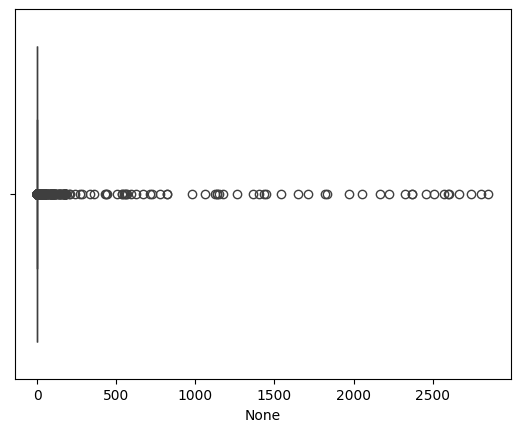

In [ ]:
diff_co2_gcp = owid_co2_cont['co2'] - owid_co2_cont['co2 (GCP)']

sns.boxplot(x=diff_co2_gcp);

In [ ]:
#combien de lignes ont une différence entre co2 et co2 GCP
print("diff > 0 = ", (diff_co2_gcp > 0).sum())
print("diff > 0 = ", (diff_co2_gcp == 0).sum())

diff > 0 =  455
diff > 0 =  2524


455 lignes ont une valeur différentre en CO2 et CO2 (GCP).
2524 lignes ont la même valeur.

In [ ]:
#calcul de la diff par continents
groupby = owid_co2_cont.groupby('country').agg({'co2' : 'sum', 'co2 (GCP)' : 'sum'})

groupby['diff'] = abs(groupby['co2'] - groupby['co2 (GCP)'])

display(groupby.sort_values(by='diff', ascending=False))

,co2,co2 (GCP),diff
country,,,
Asia,601626.877,523895.559,77731.318
North America,496436.927,488638.509,7798.418
Oceania,22155.228,21954.841,200.387
Africa,52596.171,52595.756,0.415
Europe,548198.102,548198.097,0.005
South America,46348.124,46348.122,0.002
Asia (excl. China and India),266225.323,266225.323,0.000
Europe (excl. EU-27),249747.627,249747.627,0.000
European Union (28),378228.177,378228.177,0.000


On remarque une grande différence cumulée pour Asie, un peu moins pour North America.
Cela est dû au fait que les données proviennent pas des mêmes sources (méthodologies et calculs différents)